In [1]:
# nltk.download()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

In [3]:
df = pd.read_csv('sentiment')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              101 non-null    object
 1   NotificationDate  101 non-null    object
 2   Year              101 non-null    int64 
 3   Statement         101 non-null    object
 4   SentimentScores   101 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.1+ KB


In [4]:
df.head()

,Name,NotificationDate,Year,Statement,SentimentScores
0,GoGet,31/01/2018,2018,A statement from GoGet’s CEO To our valued mem...,"(29, 30, 0.9888034360162143, 0.9937109887599945)"
1,Facebook,22/03/2018,2018,I want to share an update on the Cambridge Ana...,"(23, 22, 0.9935034539388574, 0.9962657337838953)"
2,Under Armour,29/03/2018,2018,To the MyFitnessPal Community: We are writing...,"(51, 47, 0.9923088807685703, 0.9949960924209432)"
3,PageUp People,06/05/2018,2018,Information update 5 June 2018 As part of our...,"(7, 3, 0.9801284670829773, 0.9722663958867391)"
4,Family Planning NSW,14/05/2018,2018,We are writing to personally inform you and ap...,"(13, 5, 0.995694284255688, 0.9942927837371827)"


### Drop one record 

In [5]:
# Drop one record so total records = 100
df[df['Name']=='Department of Foreign Affairs and Trade']

,Name,NotificationDate,Year,Statement,SentimentScores
45,Department of Foreign Affairs and Trade,30/09/2020,2020,We apologise for unintentionally disclosing em...,"(1, 2, 0.9985206723213196, 0.9872955679893494)"


In [6]:
index_to_drop = 45
df.drop(index_to_drop, inplace=True)
df = df.reset_index(drop=True)

#### Determine the number of rows and columns in the dataset

In [7]:
df.shape

(100, 5)

### Plot year

In [8]:
#function to display values on barcharts
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height(), fontsize=14)
                ax.text(_x, _y, value, ha="center", fontsize=12) 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.1)
                value = '{:.0f}'.format(p.get_width(), fontsize=14)
                ax.text(_x, _y, value, ha="left", fontsize=12)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

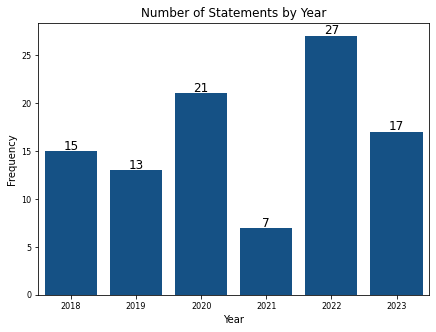

In [9]:
value_counts = df['Year'].value_counts()

# Create bar plot
plt.figure(figsize=(7, 5))
p = sns.barplot(x=value_counts.index, y=value_counts.values, color='#035397')
show_values(p)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Number of Statements by Year')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

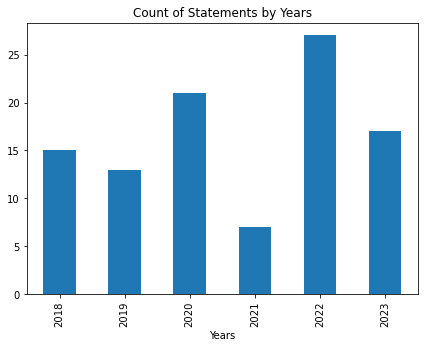

In [10]:
# Alternatively
ax = df['Year'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Statements by Years', 
          figsize=(7,5))

ax.set_xlabel('Years')
plt.show()

### Basic NLTK

In [11]:
text = df['Statement'][0]

In [12]:
# Get tokens
tokens = nltk.word_tokenize(text)

# Get first 10
tokens[:10]

['A', 'statement', 'from', 'GoGet', '’', 's', 'CEO', 'To', 'our', 'valued']

In [13]:
# Get part of speech for each token
# POS tag meaning: https://www.guru99.com/pos-tagging-chunking-nltk.html
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('A', 'DT'),
 ('statement', 'NN'),
 ('from', 'IN'),
 ('GoGet', 'NNP'),
 ('’', 'NNP'),
 ('s', 'VBD'),
 ('CEO', 'NNP'),
 ('To', 'TO'),
 ('our', 'PRP$'),
 ('valued', 'VBN')]

In [14]:
# Get chunks of words based on specified grammar
# https://www.nltk.org/api/nltk.chunk.html
from nltk.chunk import RegexpParser

# Define a chunking grammar using regular expressions
chunk_grammar = r"""
    NP: {<DT|JJ|NN.*>+} # Chunk sequences of determiners, adjectives, and nouns
"""

# Create a chunk parser using the defined grammar
chunk_parser = RegexpParser(chunk_grammar)

# Perform chunking on the tagged sentence
chunks = chunk_parser.parse(tagged)

# Print the resulting chunks
chunks.pprint()

(S
  (NP A/DT statement/NN)
  from/IN
  (NP GoGet/NNP ’/NNP)
  s/VBD
  (NP CEO/NNP)
  To/TO
  our/PRP$
  valued/VBN
  (NP members/NNS)
  past/IN
  and/CC
  (NP present/JJ)
  ,/,
  and/CC
  (NP other/JJ individuals/NNS)
  affected/VBN
  by/IN
  (NP this/DT incident/NN)
  ./.
  We/PRP
  wish/VBP
  to/TO
  notify/VB
  you/PRP
  of/IN
  (NP an/DT incident/NN)
  that/WDT
  has/VBZ
  involved/VBN
  (NP unauthorised/JJ activity/NN)
  on/IN
  our/PRP$
  (NP system/NN)
  ./.
  On/IN
  27/CD
  (NP June/NNP)
  2017/CD
  ,/,
  (NP GoGet/NNP ’/NNP)
  s/VBD
  (NP IT/NNP team/NN)
  identified/VBD
  suspected/VBN
  (NP unauthorised/JJ activity/NN)
  on/IN
  its/PRP$
  (NP system/NN)
  and/CC
  (NP a/DT full/JJ internal/JJ investigation/NN)
  was/VBD
  immediately/RB
  commenced/VBN
  ./.
  (NP GoGet/NNP)
  quickly/RB
  reported/VBD
  (NP the/DT incident/NN)
  to/TO
  (NP the/DT NSW/NNP Police/NNP ’/NNP s/NN Cybercrime/NNP Squad/NNP)
  and/CC
  has/VBZ
  since/IN
  worked/VBN
  closely/RB
  with/IN
  (

### VADER Sentiment Scoring

In [15]:
# Ref: https://github.com/cjhutto/vaderSentiment
# Ref: https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial/notebook
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [16]:
sia.polarity_scores(df['Statement'][0])

{'neg': 0.082, 'neu': 0.811, 'pos': 0.108, 'compound': 0.9923}

In [17]:
# Create a dictionary with company name, its VADER scores
res = {}

# Loop through 

for _, row in tqdm(df.iterrows(), total=len(df), desc="Processing"):
    text = row['Statement']
    company = row['Name']
    res[company] = sia.polarity_scores(text)

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

In [18]:
res

{'GoGet': {'neg': 0.082, 'neu': 0.811, 'pos': 0.108, 'compound': 0.9923},
 'Facebook': {'neg': 0.095, 'neu': 0.812, 'pos': 0.093, 'compound': -0.2886},
 'Under Armour': {'neg': 0.042, 'neu': 0.87, 'pos': 0.088, 'compound': 0.9955},
 'PageUp People': {'neg': 0.044,
  'neu': 0.837,
  'pos': 0.119,
  'compound': 0.9251},
 'Family Planning NSW': {'neg': 0.045,
  'neu': 0.801,
  'pos': 0.154,
  'compound': 0.9877},
 'MyHeritage': {'neg': 0.027, 'neu': 0.826, 'pos': 0.147, 'compound': 0.9982},
 'Southport Sharks': {'neg': 0.05,
  'neu': 0.867,
  'pos': 0.083,
  'compound': 0.9926},
 'Motorcycle Accessories Supermarket Pty Ltd': {'neg': 0.058,
  'neu': 0.87,
  'pos': 0.073,
  'compound': 0.9477},
 'PEXA': {'neg': 0.052, 'neu': 0.796, 'pos': 0.152, 'compound': 0.9953},
 'RCR Tomlinson': {'neg': 0.047,
  'neu': 0.832,
  'pos': 0.121,
  'compound': 0.9994},
 'The Perth Mint': {'neg': 0.05, 'neu': 0.851, 'pos': 0.1, 'compound': 0.9408},
 'Austal': {'neg': 0.046, 'neu': 0.822, 'pos': 0.133, 'compo

In [19]:
# Turn res dictionary into a dataframe
# Key becomes column, Value becomes row
pd.DataFrame(res)

,GoGet,Facebook,Under Armour,PageUp People,Family Planning NSW,MyHeritage,Southport Sharks,Motorcycle Accessories Supermarket Pty Ltd,PEXA,RCR Tomlinson,...,TAFE South Australia,Amnesty International Australia,Dr Felix Chan,Ambulance Victoria,NT Health,PwC,Toyota,Smartpay,HWL Ebsworth,Aristocrat
neg,0.0820,0.0950,0.0420,0.0440,0.0450,0.0270,0.0500,0.0580,0.0520,0.0470,...,0.0380,0.0520,0.0420,0.0330,0.0410,0.0700,0.0160,0.0400,0.0300,0.0960
neu,0.8110,0.8120,0.8700,0.8370,0.8010,0.8260,0.8670,0.8700,0.7960,0.8320,...,0.8700,0.8140,0.7730,0.8980,0.8840,0.8340,0.9420,0.9010,0.8370,0.8220
pos,0.1080,0.0930,0.0880,0.1190,0.1540,0.1470,0.0830,0.0730,0.1520,0.1210,...,0.0920,0.1350,0.1850,0.0690,0.0750,0.0960,0.0420,0.0580,0.1330,0.0820
compound,0.9923,-0.2886,0.9955,0.9251,0.9877,0.9982,0.9926,0.9477,0.9953,0.9994,...,0.9963,0.9809,0.9729,0.8882,0.9081,0.9777,0.8126,0.4404,0.9925,-0.3612


In [20]:
# Transpose above dataframe to swap columns and rows
pd.DataFrame(res).T

,neg,neu,pos,compound
GoGet,0.082,0.811,0.108,0.9923
Facebook,0.095,0.812,0.093,-0.2886
Under Armour,0.042,0.870,0.088,0.9955
PageUp People,0.044,0.837,0.119,0.9251
Family Planning NSW,0.045,0.801,0.154,0.9877
...,...,...,...,...
PwC,0.070,0.834,0.096,0.9777
Toyota,0.016,0.942,0.042,0.8126
Smartpay,0.040,0.901,0.058,0.4404
HWL Ebsworth,0.030,0.837,0.133,0.9925


In [21]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Name'})
vaders = vaders.merge(df, how='left', on='Name')

In [22]:
vaders.head()

,Name,neg,neu,pos,compound,NotificationDate,Year,Statement,SentimentScores
0,GoGet,0.082,0.811,0.108,0.9923,31/01/2018,2018,A statement from GoGet’s CEO To our valued mem...,"(29, 30, 0.9888034360162143, 0.9937109887599945)"
1,Facebook,0.095,0.812,0.093,-0.2886,22/03/2018,2018,I want to share an update on the Cambridge Ana...,"(23, 22, 0.9935034539388574, 0.9962657337838953)"
2,Facebook,0.095,0.812,0.093,-0.2886,28/09/2018,2018,"On the afternoon of Tuesday, September 25, our...","(9, 17, 0.9792490469084846, 0.9944157004356384)"
3,Under Armour,0.042,0.870,0.088,0.9955,29/03/2018,2018,To the MyFitnessPal Community: We are writing...,"(51, 47, 0.9923088807685703, 0.9949960924209432)"
4,PageUp People,0.044,0.837,0.119,0.9251,06/05/2018,2018,Information update 5 June 2018 As part of our...,"(7, 3, 0.9801284670829773, 0.9722663958867391)"


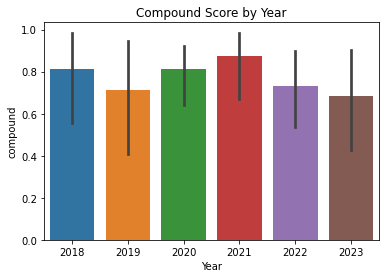

In [23]:
ax = sns.barplot(data=vaders, x='Year', y='compound')
ax.set_title('Compound Score by Year')
plt.show()

All statements have positive compound score over the years.

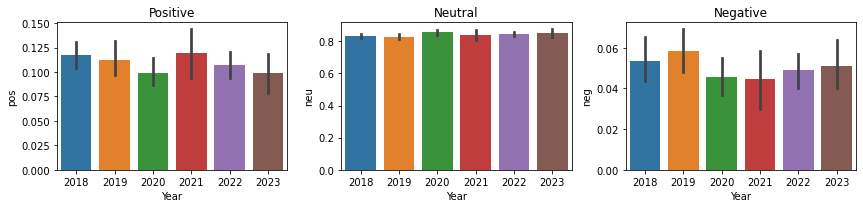

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Year', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Year', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Year', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [25]:
from statistics import mean
def get_vader_sentiment(text):
    sentences = sent_tokenize(text)

    # print(f'Number of sentences: {len(sentences)}')

    # Initialize sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()

    # Analyze sentiment of each sentence
    sentiment_scores = []
    for sentence in sentences:
        sentiment_scores.append(analyzer.polarity_scores(sentence)['compound'])

    # Calculate overall sentiment
    overall_sentiment = mean(sentiment_scores) # sum(sentiment_scores) / len(sentiment_scores)

    if overall_sentiment >= 0.05:
        return 'Positive'
    elif overall_sentiment <= -0.05:
        return 'Negative'
    else: 
        return 'Neutral'

In [26]:
df['VaderSentiment'] = df['Statement'].apply(lambda x: get_vader_sentiment(x))

In [27]:
df['VaderSentiment'].value_counts()

Positive    77
Neutral     19
Negative     4
Name: VaderSentiment, dtype: int64

### Clean SentimentScores column

In [28]:
import re

def clean_sentScore(text):
    # Remove parentheses
    clean_string = re.sub(r'[()]', '', text)

    # Remove white spaces
    clean_string = clean_string.replace(' ', '')
    
    # Split
    clean_string = clean_string.split(',')
    return clean_string

In [29]:
df['CleanSentimentScores'] = df['SentimentScores'].apply(lambda x: clean_sentScore(x))

In [30]:
df.head()

,Name,NotificationDate,Year,Statement,SentimentScores,VaderSentiment,CleanSentimentScores
0,GoGet,31/01/2018,2018,A statement from GoGet’s CEO To our valued mem...,"(29, 30, 0.9888034360162143, 0.9937109887599945)",Positive,"[29, 30, 0.9888034360162143, 0.9937109887599945]"
1,Facebook,22/03/2018,2018,I want to share an update on the Cambridge Ana...,"(23, 22, 0.9935034539388574, 0.9962657337838953)",Positive,"[23, 22, 0.9935034539388574, 0.9962657337838953]"
2,Under Armour,29/03/2018,2018,To the MyFitnessPal Community: We are writing...,"(51, 47, 0.9923088807685703, 0.9949960924209432)",Positive,"[51, 47, 0.9923088807685703, 0.9949960924209432]"
3,PageUp People,06/05/2018,2018,Information update 5 June 2018 As part of our...,"(7, 3, 0.9801284670829773, 0.9722663958867391)",Positive,"[7, 3, 0.9801284670829773, 0.9722663958867391]"
4,Family Planning NSW,14/05/2018,2018,We are writing to personally inform you and ap...,"(13, 5, 0.995694284255688, 0.9942927837371827)",Positive,"[13, 5, 0.995694284255688, 0.9942927837371827]"


### Feature Engineering new variables for sentiment

In [31]:
df['PositiveCount'] = df['CleanSentimentScores'].apply(lambda x: int(x[0]))

In [32]:
df['NegativeCount'] = df['CleanSentimentScores'].apply(lambda x: int(x[1]))

In [33]:
df['PosNegRatio'] = df['PositiveCount'] / df['NegativeCount']

In [34]:
df['PosTotalRatio'] = df['PositiveCount'] / (df['PositiveCount'] + df['NegativeCount'])

In [35]:
df['AvgPositiveConf'] = df['CleanSentimentScores'].apply(lambda x: float(x[2]))   #"{:.2f}".format(x))

In [36]:
df['AvgNegativeConf'] = df['CleanSentimentScores'].apply(lambda x: float(x[3]))

In [37]:
df[['VaderSentiment','PositiveCount','NegativeCount','PosNegRatio']]

,VaderSentiment,PositiveCount,NegativeCount,PosNegRatio
0,Positive,29,30,0.966667
1,Positive,23,22,1.045455
2,Positive,51,47,1.085106
3,Positive,7,3,2.333333
4,Positive,13,5,2.600000
...,...,...,...,...
95,Neutral,27,26,1.038462
96,Positive,10,15,0.666667
97,Positive,5,5,1.000000
98,Positive,12,3,4.000000


### Calculate statistics from text using Textstat

In [38]:
# https://pypi.org/project/textstat/
# https://www.kaggle.com/code/yhirakawa/textstat-how-to-evaluate-readability
# !pip install textstat

In [39]:
import textstat

In [40]:
def text_statistics():
    # Word count
    df['WordCount'] = df['Statement'].apply(lambda x: textstat.lexicon_count(x))
    
    # Sentence count
    df['SentenceCount'] = df['Statement'].apply(lambda x: textstat.sentence_count(x))
    
    # Flesch Reading Ease
    df['ReadingEase'] = df['Statement'].apply(lambda x: textstat.flesch_reading_ease(x))
    
    # Flesch-Kincaid Grade Level
    df['Flesch-KincaidGrade'] = df['Statement'].apply(lambda x: textstat.flesch_kincaid_grade(x))
    
    # Readability Consensus based upon all the above tests
    df['ReadabilityConsensus'] = df['Statement'].apply(lambda x: textstat.text_standard(x, float_output=False))

text_statistics()                                                    

In [41]:
df.head()

,Name,NotificationDate,Year,Statement,SentimentScores,VaderSentiment,CleanSentimentScores,PositiveCount,NegativeCount,PosNegRatio,PosTotalRatio,AvgPositiveConf,AvgNegativeConf,WordCount,SentenceCount,ReadingEase,Flesch-KincaidGrade,ReadabilityConsensus
0,GoGet,31/01/2018,2018,A statement from GoGet’s CEO To our valued mem...,"(29, 30, 0.9888034360162143, 0.9937109887599945)",Positive,"[29, 30, 0.9888034360162143, 0.9937109887599945]",29,30,0.966667,0.491525,0.988803,0.993711,1182,62,43.63,11.9,13th and 14th grade
1,Facebook,22/03/2018,2018,I want to share an update on the Cambridge Ana...,"(23, 22, 0.9935034539388574, 0.9962657337838953)",Positive,"[23, 22, 0.9935034539388574, 0.9962657337838953]",23,22,1.045455,0.511111,0.993503,0.996266,935,45,67.28,9.0,8th and 9th grade
2,Under Armour,29/03/2018,2018,To the MyFitnessPal Community: We are writing...,"(51, 47, 0.9923088807685703, 0.9949960924209432)",Positive,"[51, 47, 0.9923088807685703, 0.9949960924209432]",51,47,1.085106,0.520408,0.992309,0.994996,1293,81,46.78,10.7,11th and 12th grade
3,PageUp People,06/05/2018,2018,Information update 5 June 2018 As part of our...,"(7, 3, 0.9801284670829773, 0.9722663958867391)",Positive,"[7, 3, 0.9801284670829773, 0.9722663958867391]",7,3,2.333333,0.700000,0.980128,0.972266,212,9,39.06,13.7,15th and 16th grade
4,Family Planning NSW,14/05/2018,2018,We are writing to personally inform you and ap...,"(13, 5, 0.995694284255688, 0.9942927837371827)",Positive,"[13, 5, 0.995694284255688, 0.9942927837371827]",13,5,2.600000,0.722222,0.995694,0.994293,338,19,53.41,10.2,12th and 13th grade


### Count of external links

In [42]:
import re

def find_hyperlinks(text):
    # Find hyperlinks that start with https, http or www
    pattern = r'(http[s]?://|www\.)[a-zA-Z0-9]+(?:\.[a-zA-Z]+)+'    
    hyperlinks = re.findall(pattern, text)
    return len(hyperlinks)

In [43]:
df['HyperlinksCount'] = df['Statement'].apply(lambda x: find_hyperlinks(x))

In [44]:
df['HyperlinksCount'].value_counts().sort_index()

0     69
1     14
2      4
3      5
4      2
6      1
7      1
10     1
11     1
12     2
Name: HyperlinksCount, dtype: int64

In [45]:
df[df['HyperlinksCount'] == 12]

,Name,NotificationDate,Year,Statement,SentimentScores,VaderSentiment,CleanSentimentScores,PositiveCount,NegativeCount,PosNegRatio,PosTotalRatio,AvgPositiveConf,AvgNegativeConf,WordCount,SentenceCount,ReadingEase,Flesch-KincaidGrade,ReadabilityConsensus,HyperlinksCount
14,Nova,27/12/2018,2018,Nova Entertainment has recently become aware t...,"(50, 43, 0.9902377665042877, 0.9935560974963876)",Positive,"[50, 43, 0.9902377665042877, 0.9935560974963876]",50,43,1.162791,0.537634,0.990238,0.993556,1801,97,35.68,12.9,14th and 15th grade,12
61,CTARS,30/05/2022,2022,"On the evening of 15 May 2022, we (CTARS- a cl...","(37, 38, 0.9859133588301169, 0.975390402894271)",Positive,"[37, 38, 0.9859133588301169, 0.975390402894271]",37,38,0.973684,0.493333,0.985913,0.975390,1873,83,40.08,13.3,13th and 14th grade,12


In [46]:
df.head()

,Name,NotificationDate,Year,Statement,SentimentScores,VaderSentiment,CleanSentimentScores,PositiveCount,NegativeCount,PosNegRatio,PosTotalRatio,AvgPositiveConf,AvgNegativeConf,WordCount,SentenceCount,ReadingEase,Flesch-KincaidGrade,ReadabilityConsensus,HyperlinksCount
0,GoGet,31/01/2018,2018,A statement from GoGet’s CEO To our valued mem...,"(29, 30, 0.9888034360162143, 0.9937109887599945)",Positive,"[29, 30, 0.9888034360162143, 0.9937109887599945]",29,30,0.966667,0.491525,0.988803,0.993711,1182,62,43.63,11.9,13th and 14th grade,4
1,Facebook,22/03/2018,2018,I want to share an update on the Cambridge Ana...,"(23, 22, 0.9935034539388574, 0.9962657337838953)",Positive,"[23, 22, 0.9935034539388574, 0.9962657337838953]",23,22,1.045455,0.511111,0.993503,0.996266,935,45,67.28,9.0,8th and 9th grade,0
2,Under Armour,29/03/2018,2018,To the MyFitnessPal Community: We are writing...,"(51, 47, 0.9923088807685703, 0.9949960924209432)",Positive,"[51, 47, 0.9923088807685703, 0.9949960924209432]",51,47,1.085106,0.520408,0.992309,0.994996,1293,81,46.78,10.7,11th and 12th grade,2
3,PageUp People,06/05/2018,2018,Information update 5 June 2018 As part of our...,"(7, 3, 0.9801284670829773, 0.9722663958867391)",Positive,"[7, 3, 0.9801284670829773, 0.9722663958867391]",7,3,2.333333,0.700000,0.980128,0.972266,212,9,39.06,13.7,15th and 16th grade,0
4,Family Planning NSW,14/05/2018,2018,We are writing to personally inform you and ap...,"(13, 5, 0.995694284255688, 0.9942927837371827)",Positive,"[13, 5, 0.995694284255688, 0.9942927837371827]",13,5,2.600000,0.722222,0.995694,0.994293,338,19,53.41,10.2,12th and 13th grade,0


### Count of cybersecurity keywords

In [47]:
# Ref: https://aisel.aisnet.org/cgi/viewcontent.cgi?article=2071&context=jais

from collections import Counter

def count_keywords_in_text(keywords, text):
    # Convert the text to lowercase for case-insensitive comparison
    lower_text = text.lower()
    
    # Initialize an empty counter
    keyword_counts = Counter()
    
    # Count occurrences of each keyword in the text
    for keyword in keywords:
        lower_keyword = keyword.lower()
        count = lower_text.count(lower_keyword)
        keyword_counts[keyword] = count
    
    # Convert to dictionary
    keyword_counts_dict = dict(keyword_counts)
    
    # Return sum of keyword counts
    return sum(keyword_counts_dict.values())

# List of keywords to count
cyber_keywords = ["Security breach", "Virus", "Cybersecurity", "Cyber security",
           "Information security", "Virus", "Cyberattack", "Cyber attack",
           "Intrusion", "Security measure", "Security incident",
           "Identity theft", "Computer virus", "Network security",
           "Denial of service", "Data breach", "Malware",
           "Encryption", "Hacker", "Worm",
           "Access control", "Security monitoring", "Security management",
           "Data theft", "Computer security", "Information risk",
           "Phishing", "InfoSec", "Cyberfraud", "Cyber fraud",
           "Information systems security", "Security expenditure", "Computer system security", "Computer breach"]

In [48]:
df['CyberKeywordCount'] = df['Statement'].apply(lambda x: count_keywords_in_text(cyber_keywords, x))

In [49]:
df.head()

,Name,NotificationDate,Year,Statement,SentimentScores,VaderSentiment,CleanSentimentScores,PositiveCount,NegativeCount,PosNegRatio,PosTotalRatio,AvgPositiveConf,AvgNegativeConf,WordCount,SentenceCount,ReadingEase,Flesch-KincaidGrade,ReadabilityConsensus,HyperlinksCount,CyberKeywordCount
0,GoGet,31/01/2018,2018,A statement from GoGet’s CEO To our valued mem...,"(29, 30, 0.9888034360162143, 0.9937109887599945)",Positive,"[29, 30, 0.9888034360162143, 0.9937109887599945]",29,30,0.966667,0.491525,0.988803,0.993711,1182,62,43.63,11.9,13th and 14th grade,4,4
1,Facebook,22/03/2018,2018,I want to share an update on the Cambridge Ana...,"(23, 22, 0.9935034539388574, 0.9962657337838953)",Positive,"[23, 22, 0.9935034539388574, 0.9962657337838953]",23,22,1.045455,0.511111,0.993503,0.996266,935,45,67.28,9.0,8th and 9th grade,0,0
2,Under Armour,29/03/2018,2018,To the MyFitnessPal Community: We are writing...,"(51, 47, 0.9923088807685703, 0.9949960924209432)",Positive,"[51, 47, 0.9923088807685703, 0.9949960924209432]",51,47,1.085106,0.520408,0.992309,0.994996,1293,81,46.78,10.7,11th and 12th grade,2,0
3,PageUp People,06/05/2018,2018,Information update 5 June 2018 As part of our...,"(7, 3, 0.9801284670829773, 0.9722663958867391)",Positive,"[7, 3, 0.9801284670829773, 0.9722663958867391]",7,3,2.333333,0.700000,0.980128,0.972266,212,9,39.06,13.7,15th and 16th grade,0,1
4,Family Planning NSW,14/05/2018,2018,We are writing to personally inform you and ap...,"(13, 5, 0.995694284255688, 0.9942927837371827)",Positive,"[13, 5, 0.995694284255688, 0.9942927837371827]",13,5,2.600000,0.722222,0.995694,0.994293,338,19,53.41,10.2,12th and 13th grade,0,2


In [50]:
df['CyberKeywordCount'].value_counts().sort_index()

0     19
1     20
2     17
3     10
4      7
5      6
6      4
7      1
8      2
9      2
10     3
11     2
12     3
14     2
17     1
32     1
Name: CyberKeywordCount, dtype: int64

In [51]:
df[df['CyberKeywordCount'] == 17]

,Name,NotificationDate,Year,Statement,SentimentScores,VaderSentiment,CleanSentimentScores,PositiveCount,NegativeCount,PosNegRatio,PosTotalRatio,AvgPositiveConf,AvgNegativeConf,WordCount,SentenceCount,ReadingEase,Flesch-KincaidGrade,ReadabilityConsensus,HyperlinksCount,CyberKeywordCount
6,Southport Sharks,04/06/2018,2018,"To our valued members, customers, employees, c...","(43, 36, 0.9847643957581631, 0.988877609372139)",Positive,"[43, 36, 0.9847643957581631, 0.988877609372139]",43,36,1.194444,0.544304,0.984764,0.988878,1522,80,35.27,13.1,13th and 14th grade,11,17


### Count of authority names

In [52]:
# List of keywords to count
authority_keywords = ["Privacy Commissioner", "Office of the Victorian Information Commissioner", "OVIC", "Federal Government",
           "Australian Federal Police", "AFP", "Office of the Australian Information Commissioner", "OAIC",
           "Australian Security and Investment Commission", "ASIC",
           "Australian Prudential Regulation Authority", "APRA",
           "Australian Competition and Consumer Protection", "ACCC",
           "Attorney-General’s Department",
           "NSW Police Cybercrime Squad", "NSW Police", "GDPR",
           "Victoria Police Cyber Crimes Unit", "Australian Cybercrime Online Reporting Network", "CERT Australia",
           "Australian Cyber Security Centre", "Australian Registras' National Electronic Conveyancing Council", "ARNECC",
           "IDCARE", "West Australian Police Force", "Privacy Committee of South Australia", "South Australian Police"]

In [53]:
df['AuthorityKeywordCount'] = df['Statement'].apply(lambda x: count_keywords_in_text(authority_keywords, x))

In [54]:
df['AuthorityKeywordCount'].value_counts().sort_index()

0     44
1     15
2     10
3      5
4      5
5      3
6      5
7      1
8      1
9      1
10     1
12     1
15     2
19     1
21     1
22     1
23     1
34     1
35     1
Name: AuthorityKeywordCount, dtype: int64

In [55]:
df[df['AuthorityKeywordCount'] == 35]

,Name,NotificationDate,Year,Statement,SentimentScores,VaderSentiment,CleanSentimentScores,PositiveCount,NegativeCount,PosNegRatio,...,AvgPositiveConf,AvgNegativeConf,WordCount,SentenceCount,ReadingEase,Flesch-KincaidGrade,ReadabilityConsensus,HyperlinksCount,CyberKeywordCount,AuthorityKeywordCount
27,Australian Sports Commission,10/12/2019,2019,Message from the ASC CEO I would like to prov...,"(53, 68, 0.9847516428749516, 0.9860326735412374)",Positive,"[53, 68, 0.9847516428749516, 0.9860326735412374]",53,68,0.779412,...,0.984752,0.986033,2362,128,44.24,11.7,12th and 13th grade,3,8,35


### Count of FAQs sections

In [68]:
# List of keywords to count
faq_keywords = ["Frequently Asked Questions", "FAQ"]

In [69]:
df['FAQKeywordCount'] = df['Statement'].apply(lambda x: count_keywords_in_text(faq_keywords, x))
df['FAQKeywordCount'].value_counts().sort_index()

0    84
1     9
2     5
3     2
Name: FAQKeywordCount, dtype: int64

There are a total of 16 statements which have a FAQ section i.e. have at least one mentioning of FAQ keywords.

In [71]:
df[df['FAQKeywordCount'] == 3]

,Name,NotificationDate,Year,Statement,SentimentScores,VaderSentiment,CleanSentimentScores,PositiveCount,NegativeCount,PosNegRatio,...,AvgNegativeConf,WordCount,SentenceCount,ReadingEase,Flesch-KincaidGrade,ReadabilityConsensus,HyperlinksCount,CyberKeywordCount,AuthorityKeywordCount,FAQKeywordCount
6,Southport Sharks,04/06/2018,2018,"To our valued members, customers, employees, c...","(43, 36, 0.9847643957581631, 0.988877609372139)",Positive,"[43, 36, 0.9847643957581631, 0.988877609372139]",43,36,1.194444,...,0.988878,1522,80,35.27,13.1,13th and 14th grade,11,17,10,3
18,Kathmandu,13/03/2019,2019,We have recently become aware that between 8 J...,"(25, 22, 0.9962087750434876, 0.9954065003178336)",Positive,"[25, 22, 0.9962087750434876, 0.9954065003178336]",25,22,1.136364,...,0.995407,1159,46,45.90,13.1,14th and 15th grade,1,2,6,3


### Average Word Length

In [95]:
def avg_word_len(s):
    words = s.split(' ') # presuming words split by ' '
    # re sub '[^\w\s]' to remove punctuations first
    words = [re.sub(r'[^\w\s]','',w) for w in words] 
    # Remove zero-length words eg. blank space created by s.split(' ') above
    words = [word for word in words if word]
    return sum(len(w) for w in words)/float(len(words)) # then calculate the avg, dont forget to render answer as a float

In [96]:
df['AvgWordLength'] = df['Statement'].apply(lambda x: avg_word_len(x))

In [97]:
df['AvgWordLength'].describe()

count    100.000000
mean       5.303603
std        0.269924
min        4.528342
25%        5.142722
50%        5.309454
75%        5.474587
max        6.112971
Name: AvgWordLength, dtype: float64

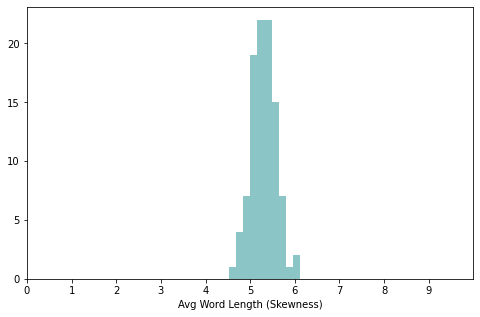

In [103]:
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(df['AvgWordLength'],alpha=0.45,color='teal')
ax.set_xlabel('Avg Word Length (Skewness)')
ax.grid(False)
plt.xticks(range(10))
plt.xlim([0, 10])
plt.show()

### Average sentence length

In [120]:
def avg_sentence_len(text):
    sents = text.split('.')    
    # Remove zero-length sentences
    sents = [sent for sent in sents if sent]
    return float(sum(len(x.split()) for x in sents) / len(sents))

In [122]:
df['AvgSentenceLength'] = df['Statement'].apply(lambda x: avg_sentence_len(x))

In [128]:
df['AvgSentenceLength'].describe()

count    100.000000
mean      19.327024
std        4.156542
min       12.352941
25%       15.702381
50%       18.983333
75%       21.970096
max       31.437500
Name: AvgSentenceLength, dtype: float64

In [129]:
df.head()

,Name,NotificationDate,Year,Statement,SentimentScores,VaderSentiment,CleanSentimentScores,PositiveCount,NegativeCount,PosNegRatio,...,SentenceCount,ReadingEase,Flesch-KincaidGrade,ReadabilityConsensus,HyperlinksCount,CyberKeywordCount,AuthorityKeywordCount,FAQKeywordCount,AvgWordLength,AvgSentenceLength
0,GoGet,31/01/2018,2018,A statement from GoGet’s CEO To our valued mem...,"(29, 30, 0.9888034360162143, 0.9937109887599945)",Positive,"[29, 30, 0.9888034360162143, 0.9937109887599945]",29,30,0.966667,...,62,43.63,11.9,13th and 14th grade,4,4,19,2,5.342640,18.181818
1,Facebook,22/03/2018,2018,I want to share an update on the Cambridge Ana...,"(23, 22, 0.9935034539388574, 0.9962657337838953)",Positive,"[23, 22, 0.9935034539388574, 0.9962657337838953]",23,22,1.045455,...,45,67.28,9.0,8th and 9th grade,0,0,0,0,4.528342,20.822222
2,Under Armour,29/03/2018,2018,To the MyFitnessPal Community: We are writing...,"(51, 47, 0.9923088807685703, 0.9949960924209432)",Positive,"[51, 47, 0.9923088807685703, 0.9949960924209432]",51,47,1.085106,...,81,46.78,10.7,11th and 12th grade,2,0,0,2,5.165507,14.965517
3,PageUp People,06/05/2018,2018,Information update 5 June 2018 As part of our...,"(7, 3, 0.9801284670829773, 0.9722663958867391)",Positive,"[7, 3, 0.9801284670829773, 0.9722663958867391]",7,3,2.333333,...,9,39.06,13.7,15th and 16th grade,0,1,0,2,5.240566,21.200000
4,Family Planning NSW,14/05/2018,2018,We are writing to personally inform you and ap...,"(13, 5, 0.995694284255688, 0.9942927837371827)",Positive,"[13, 5, 0.995694284255688, 0.9942927837371827]",13,5,2.600000,...,19,53.41,10.2,12th and 13th grade,0,2,2,0,5.189349,15.454545


### Count of contact numbers

In [56]:
# def count_contact_numbers(text):
#     pattern1 = r'\b\d{10}\b'  # Match 10-digit consecutive numbers
#     pattern2 = r'\b\d{4} \d{3} \d{3}\b' # Match number in format 1800 557 394
#     pattern2 = r'\b\d{2} \d{2} \d{2}\b' # Match number in format 13 11 14
    
#     patterns = [pattern1, pattern2]
    
#     contact_number_count = []
    
#     for pattern in patterns:
#         contact_number_count.append(len(re.findall(pattern, text)))
#     return sum(contact_number_count)

# def count_email_addresses(text):
#     pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b'  # Basic email regex
#     email_count = len(re.findall(pattern, text, re.IGNORECASE))
#     return email_count

# def count_faqs(text, faqs):
#     faq_count = {faq: text.lower().count(faq.lower()) for faq in faqs}
#     return faq_count

# # Sample text document
# text = """
# For more information, contact us at 1234567890 or email us at example@email.com.
# Here are some frequently asked questions:
# 1. How do I reset my password?
# 2. What is your return policy?
# 3. Can I track my order?
# """

# # Count contact numbers and email addresses
# contact_number_count = count_contact_numbers(text)
# email_count = count_email_addresses(text)

# # Count FAQs
# faqs = ["How do I reset my password?", "What is your return policy?", "Can I track my order?"]
# faq_counts = count_faqs(text, faqs)

# print("Contact Number Count:", contact_number_count)
# print("Email Address Count:", email_count)
# print("FAQ Counts:", faq_counts)

In [130]:
# df.to_csv('features.csv', index=False)